In [13]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARMA
%matplotlib inline

In [14]:
df = pd.read_csv(Path('df_8_30_2020.csv'))
df.set_index('Date',inplace = True)
df.tail()

,BTCUSDT,EOSUSDT,ETHUSDT,LINKUSDT,LTCUSDT
Date,,,,,
8/30/2020 23:24,11707.26,3.2443,429.48,16.6062,62.76
8/30/2020 23:25,11709.59,3.2431,429.32,16.5777,62.79
8/30/2020 23:26,11706.45,3.2393,428.99,16.5446,62.78
8/30/2020 23:27,11702.11,3.2379,428.30,16.5507,62.73
8/30/2020 23:28,11699.99,3.2376,NaN,NaN,62.72


In [15]:
independent = 'ETHUSDT'
dependent = 'BTCUSDT'

#def generate_signals(df,independent,dependent,multiplier,f_sample):
df = df.pct_change()
df = df.dropna()
df_insample = pd.DataFrame()
residuals2_mean = []
residuals2_std = []
f_sample = 60 #delete this one set upas function
result = []
residuals2_list = []

In [16]:
for n in range(f_sample): #f_sample is the out-of-sample data
    df_insample = df.iloc[0 : len(df) - f_sample + n]
    X = df_insample[independent].values.reshape(-1, 1)
    y = df_insample[dependent]
    model = LinearRegression()
    model.fit(X, y)
    predicted_y_values = model.predict(X)
    residuals = df_insample.loc[:,'BTCUSDT'] - predicted_y_values
    model_ARMA = ARMA(residuals.values, order = (1,1))
    results = model_ARMA.fit()
    a = results.params[0]
    b = results.params[1]
    c = results.params[2]

    kappa = -np.log(b)
    m = a / (1 - np.exp(-kappa))
    residuals_shifted = residuals.shift()
    residuals_shifted2 = residuals_shifted.shift()
    errors = residuals_shifted - (a + b*residuals_shifted2)
    residuals2 = residuals - (a + b*residuals_shifted + c*errors)
    residuals2_list.append(residuals2[-1])
    sigma_epsilon = residuals2.std()
    df_results = pd.DataFrame()
    multiplier = 1 # delete for function
    df_results['signal'] = np.where(residuals2 > multiplier*sigma_epsilon, -1.0, 0.0)
    df_results['signal'] = np.where(residuals2 < -multiplier*sigma_epsilon, 1.0, 0.0)
    result.append(df_results.iloc[-1,0])
            #return df_results['signal'].iloc[-1]

#generate_signals(df,independent,dependent,1,50)

C:\Users\juanc\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\juanc\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\juanc\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\juanc\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\juanc\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

In [17]:
counter = 0
for i in range(len(result)):
    if float(result[i]) == 1.0:
        counter += 1

In [18]:
counter

7

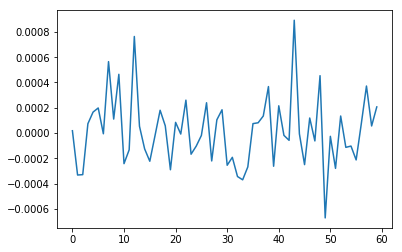

In [19]:
plt.plot(residuals2_list)

In [20]:
sigma_epsilon

0.00027313922599390516